Accuracy: 0.7922077922077922
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix: [[87 12]
 [20 35]]


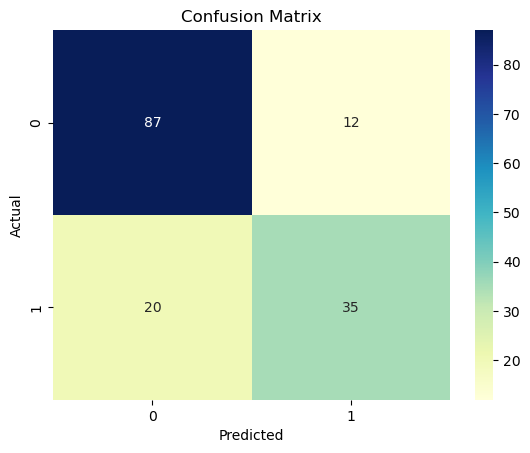

NameError: name 'plot_tree' is not defined

<Figure size 2000x1000 with 0 Axes>

In [2]:
# Step 1: Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset

df = pd.read_csv('diabetes.csv')
#df.head()

# Step 3: Check for missing values
#df.isnull().sum()

# Step 4: Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train the Decision Tree Model
Tree = DecisionTreeClassifier(random_state=42, max_depth=5)
Tree.fit(X_train_scaled, y_train)

# Step 8: Evaluate the model
y_pred = Tree.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

# Step 9: Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 10: Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title('Decision Tree for Diabetes Prediction')
#plt.show()

from sklearn.tree import export_graphviz
# Step 11:
export_graphviz(Tree, out_file = "diabetes_tree.dot", class_names=["No Diabetes", "Diabetes"], feature_names = X.columns, impurity=False, filled=True, rounded=True)
print("Decision tree exported to 'diabetes_tree.dot'")